## SCAMP Data Science Technical Assessment

Given the dataset and details visualize;

1. The best selling books of the decade
2. The percentage of fiction to non-fiction
3. Trends over the years
4. Top 10 Authors according to reviews

Approach must be detailed, clean and scale data if necessary. 

In [97]:
#import required libraries

import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#importing the data from csv and saving to a dataframe
books_df = pd.read_csv('dataset.csv')

In [99]:
#printing the first 10 rows
books_df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [100]:
#inspecting the dataframe
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


On inspection, it is observed that there are 550 rows with 7 columns. 

The 'Year' column is of type int64 which is can spell badly for our analysis. 



In [101]:
#convert the Year column to datetime format
books_df.Year = pd.to_datetime(books_df.Year, format='%Y')

In [102]:
#reinspecting the dataframe
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         550 non-null    object        
 1   Author       550 non-null    object        
 2   User Rating  550 non-null    float64       
 3   Reviews      550 non-null    int64         
 4   Price        550 non-null    int64         
 5   Year         550 non-null    datetime64[ns]
 6   Genre        550 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 30.2+ KB


In [103]:
#summary statistics 
books_df.describe(include='all')

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.000000,550.000000,550.000000,550,550
unique,351,248,NaN,NaN,NaN,11,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,2013-01-01 00:00:00,Non Fiction
freq,10,12,NaN,NaN,NaN,50,310
first,NaN,NaN,NaN,NaN,NaN,2009-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN
mean,NaN,NaN,4.618364,11953.281818,13.100000,NaN,NaN
std,NaN,NaN,0.226980,11731.132017,10.842262,NaN,NaN
min,NaN,NaN,3.300000,37.000000,0.000000,NaN,NaN
25%,NaN,NaN,4.500000,4058.000000,7.000000,NaN,NaN


In [104]:
#checking for null values 
books_df.isnull().sum()


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

There are no null values in the dataset

In [105]:
#checking for duplicates based on Name and Author subset 
books_df.duplicated(subset=['Name', 'Author']).sum()

199

There are 199 duplicated books by the same authors in this dataset

In [106]:
#dropping duplicates
books_df.drop_duplicates(subset=['Name', 'Author'], keep="first", inplace=True)

### The best selling books of the decade

Making an assumption that everyone who submitted a review has actually bought the book. This assumption is made because we do not the total sales these books made. 

The best selling books will be reviews multipled by price.

This is actually not a good assumption as the higher the reviews or the higher the price, the higher the sales will be. 

In [107]:
books_df['Sales'] = books_df['Reviews'] * books_df['Price']

In [108]:
top_20_books = books_df.sort_values('Sales', ascending=False).head(20)
top_20_books

,Name,Author,User Rating,Reviews,Price,Year,Genre,Sales
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015-01-01,Fiction,1430028
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014-01-01,Fiction,1396161
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019-01-01,Fiction,1317615
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013-01-01,Non Fiction,701295
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016-01-01,Fiction,700492
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013-01-01,Fiction,676880
32,Becoming,Michelle Obama,4.8,61133,11,2018-01-01,Non Fiction,672463
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012-01-01,Fiction,661710
365,The Fault in Our Stars,John Green,4.7,50482,13,2012-01-01,Fiction,656266
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014-01-01,Fiction,592050


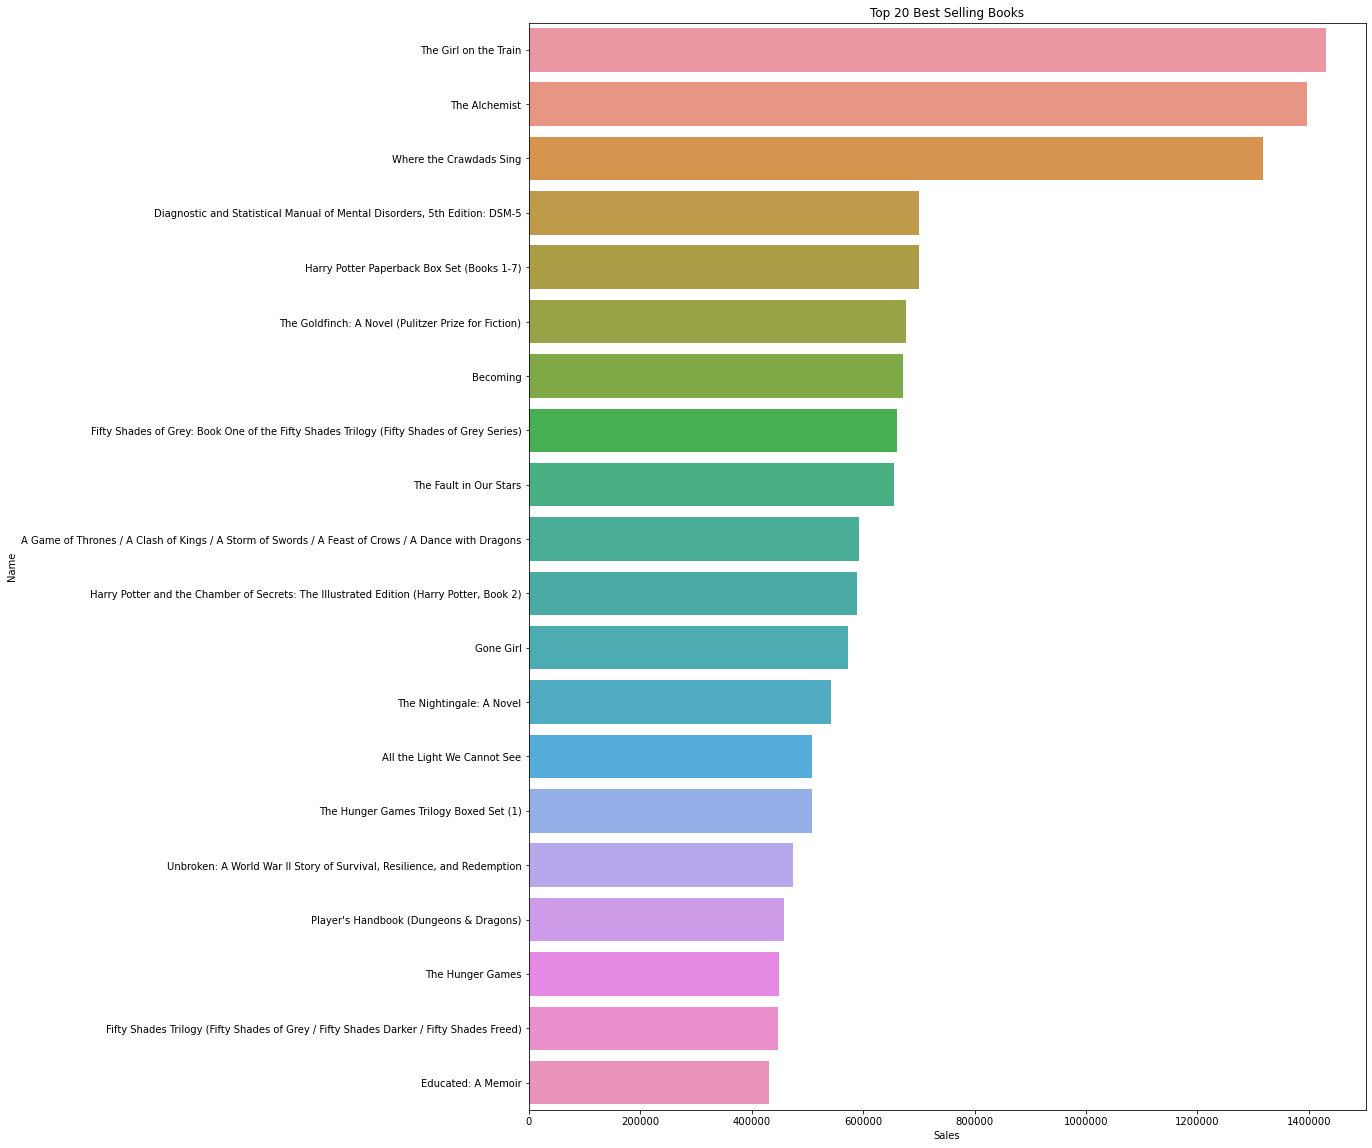

In [109]:
#plotting the data
plt.figure(figsize=(15,20))
sns.barplot(y='Name', x='Sales', data=top_20_books)
plt.title('Top 20 Best Selling Books')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.show()

### The percentage of fiction to non-fiction

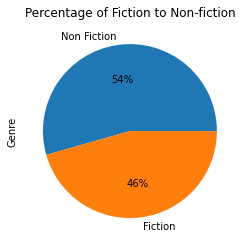

In [110]:
percent_genre = books_df['Genre'].value_counts(normalize=True)
percent_genre.plot.pie(autopct='%1.0f%%')
plt.title('Percentage of Fiction to Non-fiction')
plt.show()

The Fiction Genre is more popular than the Non-Fiction Genre

### Trends over the years

In [111]:
books_df['Year'] = books_df['Year'].dt.year


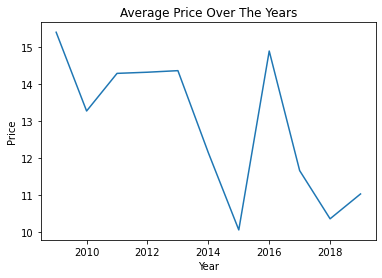

In [116]:
sns.lineplot(x='Year', y='Price', data=books_df, ci=None)
plt.title('Average Price Over The Years')
plt.show()

The average prices of books dipped in 2015 but surged in 2016. 

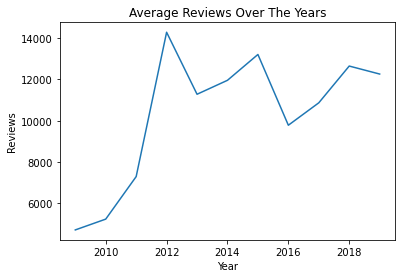

In [117]:
sns.lineplot(x='Year', y='Reviews', data=books_df, ci=None)
plt.title('Average Reviews Over The Years')
plt.show()

The average number of reviews across the years is mostly above 10,000.  

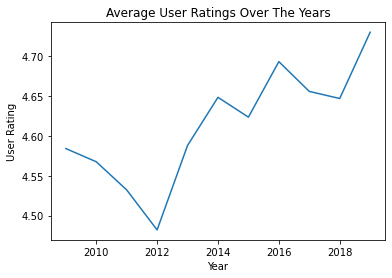

In [118]:
sns.lineplot(x='Year', y='User Rating', data=books_df, ci=None)
plt.title('Average User Ratings Over The Years')
plt.show()

User Ratings dipped in 2012 but the trend kept on going higher over the remaining years

## Top 10 Authors according to reviews

In [142]:
authors_reviews = books_df.groupby('Author')['Reviews'].agg('sum')
top_10 = authors_reviews.sort_values(ascending=False).head(10)
top_10

Author
E L James          130746
Suzanne Collins    130548
Delia Owens         87841
Paula Hawkins       79446
J.K. Rowling        70535
Jeff Kinney         67482
Michelle Obama      61133
John Grisham        60961
John Green          58973
Dan Brown           57302
Name: Reviews, dtype: int64

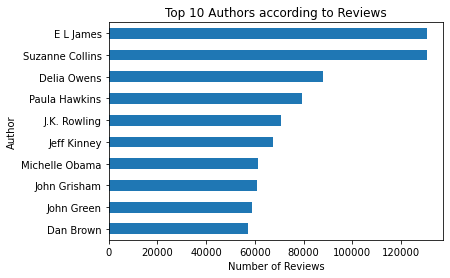

In [143]:
#plotting the top 10 authors
top_10.sort_values().plot(kind='barh')
plt.title('Top 10 Authors according to Reviews')
plt.xlabel('Number of Reviews')
plt.show()

E.L James & Suzanne Collins have the highest number of Reviews of the 10 Authors. 